# Car Price Prediction using Linear and Lasso Regression Models

The project is aims to study and predict the expected future selling price of the car based on the data collected as a features mentioned below:
    
    1. Car Name
    2. Model Year
    3. Present Price
    4. Kms Driven
    5. Fuel Type
    6. Seller Type
    7. Transmission Type
    8. Owner information

In [97]:
# Importing the Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection and Processing

In [98]:
# Loading the data set from csv file to pandas dataframe
car_dataset = pd.read_csv("car data.csv")
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [99]:
# Inspecting the first 5 rows from the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [100]:
# Inspecting the last 5 rows from the dataset
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [101]:
car_dataset.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.50,23.730,142000,Petrol,Individual,Automatic,3
189,Hero Super Splendor,2005,0.20,0.570,55000,Petrol,Individual,Manual,0
297,brio,2015,4.00,5.900,60000,Petrol,Dealer,Manual,0
150,TVS Apache RTR 180,2011,0.50,0.826,6000,Petrol,Individual,Manual,0
248,i10,2013,4.00,4.600,30000,Petrol,Dealer,Manual,0
72,corolla altis,2013,7.45,18.610,56001,Petrol,Dealer,Manual,0
166,Hero Passion Pro,2016,0.45,0.550,1000,Petrol,Individual,Manual,0
178,TVS Jupyter,2014,0.35,0.520,19000,Petrol,Individual,Automatic,0
176,Honda Karizma,2011,0.35,1.050,30000,Petrol,Individual,Manual,0
253,city,2014,7.20,9.900,48000,Diesel,Dealer,Manual,0


In [102]:
car_dataset.shape

(301, 9)

In [103]:
car_dataset.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [104]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [105]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [106]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [107]:
## Checking the distrubution of categorical variable.
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Handling the categorical data:

### Encoding of the categorical features using the dictionery.

In [108]:
## Encoding of categorical variable.
## Encoding Fuel Type Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [109]:
## Encoding Seller Type Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [110]:
## Encoding Transmission Type Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [111]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Model Building for Machine Learning Algorithms.

In [112]:
## DV and IDV selection
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)  ## Independent Vatiables
Y = car_dataset["Selling_Price"]   ### Dependent Variables

In [113]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [114]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Train / Test Split of Data:

1. Split the data into training and test data
2. Train the model on training data
3. Test the model on test data.

In [115]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=2)

In [116]:
print(X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [117]:
print(X_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [118]:
X_test.describe()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2014.129032,6.110194,28535.290323,0.290323,0.387097,0.129032,0.032258
std,2.247101,5.489114,18914.327776,0.528744,0.495138,0.340777,0.179605
min,2007.000000,0.470000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.848000,13450.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,5.800000,23000.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.500000,9.305000,45000.000000,0.500000,1.000000,0.000000,0.000000
max,2017.000000,20.450000,68000.000000,2.000000,1.000000,1.000000,1.000000


In [119]:
X_test.shape

(31, 7)

In [120]:
X_train.shape

(270, 7)

## Model Training

### Importing the Regression Models from Scikit Learn library

## Linear Regression

In [121]:
lin_reg_model = LinearRegression()

In [122]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [123]:
## Prediction on Training Data
lr_training_data_prediction = lin_reg_model.predict(X_train)

In [124]:
### R Squared Error
lr_score_train = metrics.r2_score(Y_train,lr_training_data_prediction)
print("R Squared Error : ", lr_score_train)

R Squared Error :  0.8799451660493698


### Visualize the actual price and Predicted Price

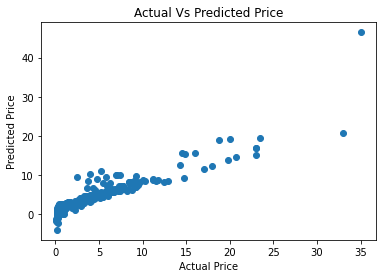

In [125]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted Price")
plt.show()

In [126]:
# prediction on Training data
lr_test_data_prediction = lin_reg_model.predict(X_test)

In [127]:
print (X_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

In [128]:
lr_test_data_prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [129]:
# R squared Error
lr_score_test = metrics.r2_score(Y_test, lr_test_data_prediction)
print("R squared Error : ", lr_score_test)

R squared Error :  0.8365766715026905


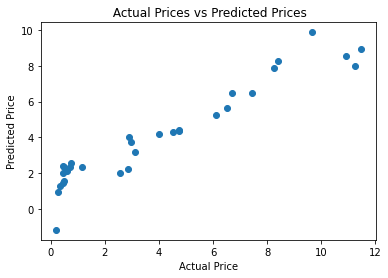

In [130]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### 2. Lasso Regression

In [131]:
# loading the linear regression model
lass_reg_model = Lasso()

In [132]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [133]:
# prediction on Training data
ls_training_data_prediction = lass_reg_model.predict(X_train)

In [134]:
# R squared Error
ls_score_train = metrics.r2_score(Y_train, ls_training_data_prediction)
print("R squared Error : ", ls_score_train)

R squared Error :  0.8427856123435794


Visualize the actual prices and Predicted prices

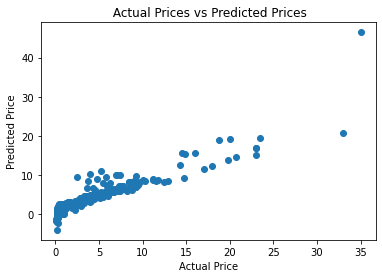

In [135]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [136]:
# prediction on Training data
ls_test_data_prediction = lass_reg_model.predict(X_test)

In [137]:
# R squared Error
ls_score_test = metrics.r2_score(Y_test, ls_test_data_prediction)
print("R squared Error : ", ls_score_test)

R squared Error :  0.8709167941173195


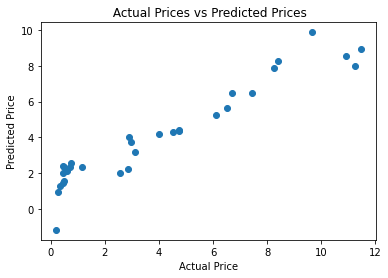

In [138]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [139]:
## Mean Absolute Error: Lower the value better is the model fit.

MAE_1 = metrics.mean_absolute_error(Y_test, lr_test_data_prediction)
MAE_2 = metrics.mean_absolute_error(Y_test, ls_test_data_prediction)

In [140]:
print(MAE_1,MAE_2)

1.1516382156614553 1.0507413774170433


## Lasso Regression is the best fit model for evaluation ans prediction purpose.

# Prediction on Random Data

In [141]:
X.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0


In [142]:
Y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [143]:
data = {"Year": 2015, 
        "Present_Price": 6, 
        "Kms_Driven": 30000, 
        "Fuel_Type": 1, 
        "Seller_Type": 1, 
        "Transmission": 1,
       "Owner":0}
data

{'Year': 2015,
 'Present_Price': 6,
 'Kms_Driven': 30000,
 'Fuel_Type': 1,
 'Seller_Type': 1,
 'Transmission': 1,
 'Owner': 0}

In [144]:
df_new = pd.DataFrame(data, index = [0])
df_new

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2015,6,30000,1,1,1,0


In [145]:
## Predict health_insurance_price on above data

new_pred = lass_reg_model.predict(df_new)
print("The predicted selling price of the car is: ", round(float(new_pred), 2))

The predicted selling price of the car is:  4.36


#################################################### End of the Report #########################################################